# Descriptive Analysis

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

In [2]:
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

plt.style.use('fivethirtyeight')

## Objectives

- Use business context to guide exploratory analyses
- Pose clear business-relevant questions and answer them with data
- Identify limitations of data for solving business problems

# Sample Data

Let's build a simple dataset, based on a hypothetical survey of the number of pairs of shoes owned by 11 random people:

In [4]:
data = np.array([5, 6, 3, 4, 4, 4, 8, 8, 1, 8, 2])
data_df = pd.DataFrame(data, columns=["Pairs of Shoes"])

## `df.describe()`

This dataset has a bunch of individual observations in a range of values. These observations have an **empirical distribution** describing how the values are distributed across this range. We'll shorten this to just **distribution** for now. Everything that follows is our attempt to understand the distribution of our data.

You can actually get a bunch of descriptive statistics from any `pandas` DataFrame using the `.describe()` method. This should be one of the first things you'll do when exploring a new dataset.

In [3]:
data_df.describe()

,Pairs of Shoes
count,11.000000
mean,4.818182
std,2.442056
min,1.000000
25%,3.500000
50%,4.000000
75%,7.000000
max,8.000000


# Different Statistical Measures

## Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

Let's see what we have for our example:

In [4]:
print(f"Mean: {(data).mean()}")
print(f"Median: {np.median(data)}")
print(f"Mode: {stats.mode(data)[0][0]}")

Mean: 4.818181818181818
Median: 4.0
Mode: 4


C:\Users\User\AppData\Local\Temp\ipykernel_4880\3004223251.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"Mode: {stats.mode(data)[0][0]}")


In [5]:
stats.mode(data)[0][0]

C:\Users\User\AppData\Local\Temp\ipykernel_4880\1204393247.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(data)[0][0]


4

In [6]:
x = [4]
x[0]

4

In [7]:
## You can also find the mode(s) using np.unique()
counts = np.unique(data, return_counts=True)
counts

(array([1, 2, 3, 4, 5, 6, 8]), array([1, 1, 1, 3, 1, 1, 3], dtype=int64))

**Discussion**: If somebody asked you "How many pairs of shoes do people usually have?", how would you answer (based on these data)?

### Mathematical Properties

The mean $\bar{x}$ is the point that minimizes the *sum of squared differences* for a given set of data.

<details>
    <summary>
        Proof
    </summary>
    We want to find the point $k$ that minimizes $L(k) = \Sigma^n_{i=1}(x_i-k)^2$. Now, a calculus trick, which we'll see again: To find the minimum of a function, we'll set its derivative to 0. Taking the derivative, we have:

$L'(k) = -2\Sigma^n_{i=1}(x_i-k)$.

Now we solve $L'(k) = 0$ for $k$:

$-2\Sigma^n_{i=1}(x_i-k) = 0$, so <br/><br/>
$\Sigma^n_{i=1}(x_i-k) = 0$, so <br/><br/>
$\Sigma^n_{i=1}x_i = \Sigma^n_{i=1}k = nk$, so <br/><br/>
$k = \frac{\Sigma^n_{i=1}x_i}{n} = \bar{x}$.
    </details>


By contrast, the median is the point that minimizes the *sum of absolute differences*.

<details>
    <summary>
    Proof
    </summary>
    We want to find the point $k$ that minimizes $D(k) = \Sigma^n_{i=1}|x_i-k|$. Taking the derivative, we have:

$D'(k) = \Sigma^n_{i=1}\frac{k-x_i}{|k-x_i|}$.

Now we solve $D'(k) = 0$ for $k$:

Consider the sum $\Sigma^n_{i=1}\frac{k-x_i}{|k-x_i|} = 0$. Ignoring the case where $k = x_i$, each of the addends in this sum is $1$ if $k\geq x_i$ and $-1$ if not. To make this sum equal to 0, we thus want to choose $k$ such that there are the same number of $1$s and $-1$s, which means that we want to choose $k$ to be the middle number, i.e. the median.

Notes:
- if $n$ is odd, then the minimum of the function occurs not where its derivative is 0 but where it is *undefined*;
- if $n$ is even, then *any* number between the two middle numbers will minimize our function. By conventional defintion of the median in cases of an even number of data points, we take the arithmetic mean of the two middle numbers.
    </details>

## Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [8]:
print(f"Min: {data.min()}")
print(f"Max: {data.max()}")
print(f"Range: {data.max() - data.min()}")

Min: 1
Max: 8
Range: 7


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [9]:
print(f"25th Percentile: {np.percentile(data, 25)}")
print(f"75th Percentile: {np.percentile(data, 75)}")
print(f"IQR: {np.percentile(data, 75) - np.percentile(data, 25)}")

25th Percentile: 3.5
75th Percentile: 7.0
IQR: 3.5


### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$.

In [10]:
print(f"Standard Deviation: {data.std()}")

Standard Deviation: 2.328408813611945


In [11]:
np.std(data, ddof=1)#, ddof=1)

2.4420557658735733

# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

Text(0.5, 1.0, 'Counts, 14 Bins')

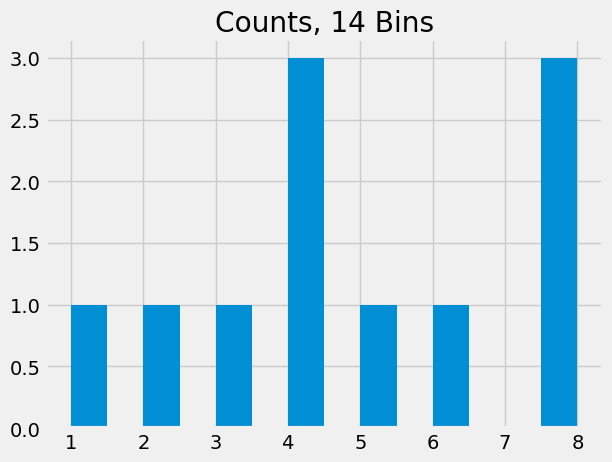

In [12]:
fig, ax = plt.subplots()
ax.hist(data, bins=14)
plt.title('Counts, 14 Bins')

Text(0.5, 1.0, 'Counts, 10 Bins')

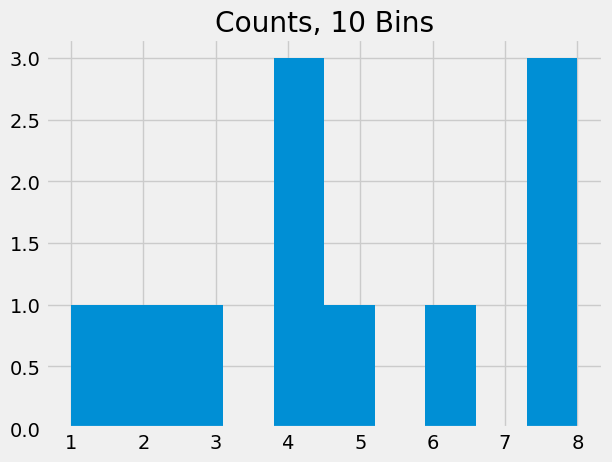

In [13]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)
plt.title('Counts, 10 Bins')

Text(0.5, 1.0, 'Counts, 5 Bins')

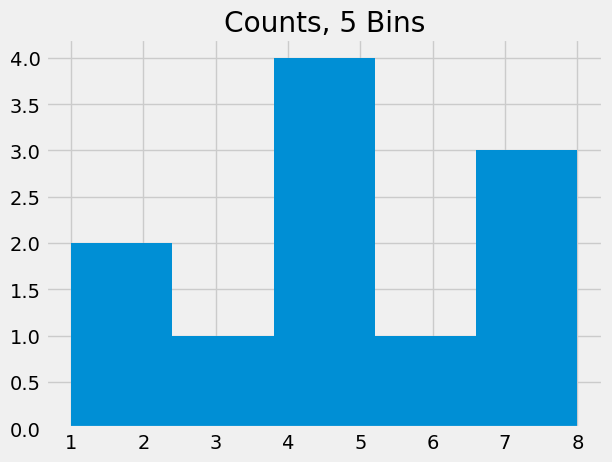

In [14]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 7 Bins')

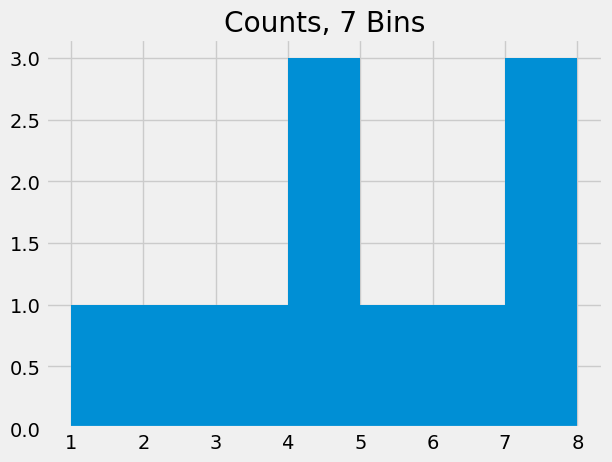

In [5]:
fig, ax = plt.subplots()
ax.hist(data, bins=7)
plt.title('Counts, 7 Bins')

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

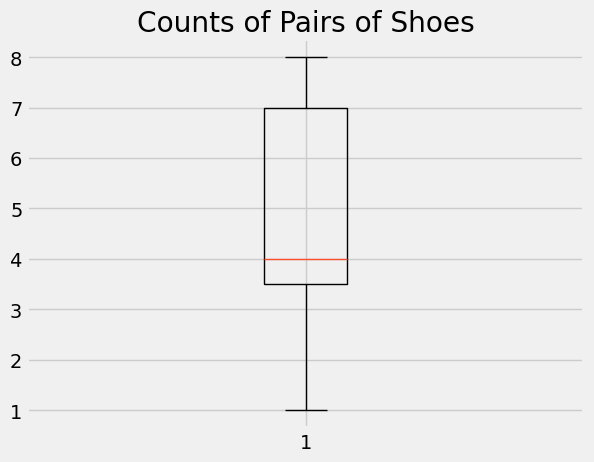

In [16]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.title('Counts of Pairs of Shoes')

# Addressing Business Questions

## Fast Food Data

In [8]:
ffood = pd.read_csv('Datafiniti_Fast_Food.csv')

In [9]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [10]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### Question 1:

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

In [11]:
ffood['name'].value_counts()

McDonald's                        1898
Taco Bell                         1032
Burger King                        833
Subway                             776
Arby's                             663
                                  ... 
D & M Subs                           1
Tony Wang's Chinese Restaurant       1
Arthur Treacher's Fish & Chips       1
Bistro To Go                         1
Stoko's                              1
Name: name, Length: 571, dtype: int64

In [13]:
counts = ffood['name'].value_counts()
high_counts = counts[counts >= 50]

C:\Users\stils\AppData\Local\Temp\ipykernel_27148\3664696334.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=high_counts.index, rotation=80);


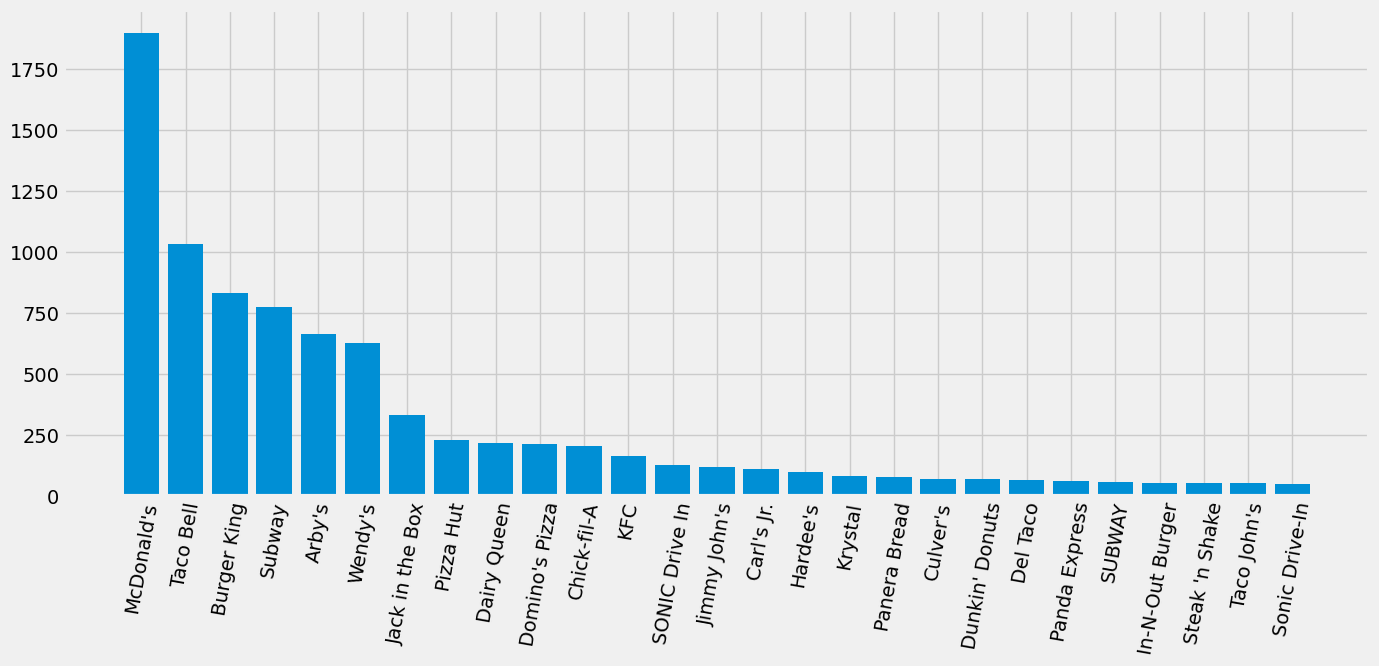

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=high_counts.index, height=high_counts)
ax.set_xticklabels(labels=high_counts.index, rotation=80);

### Question 2

Visualize the locations of restaurants in Buffalo, NY.

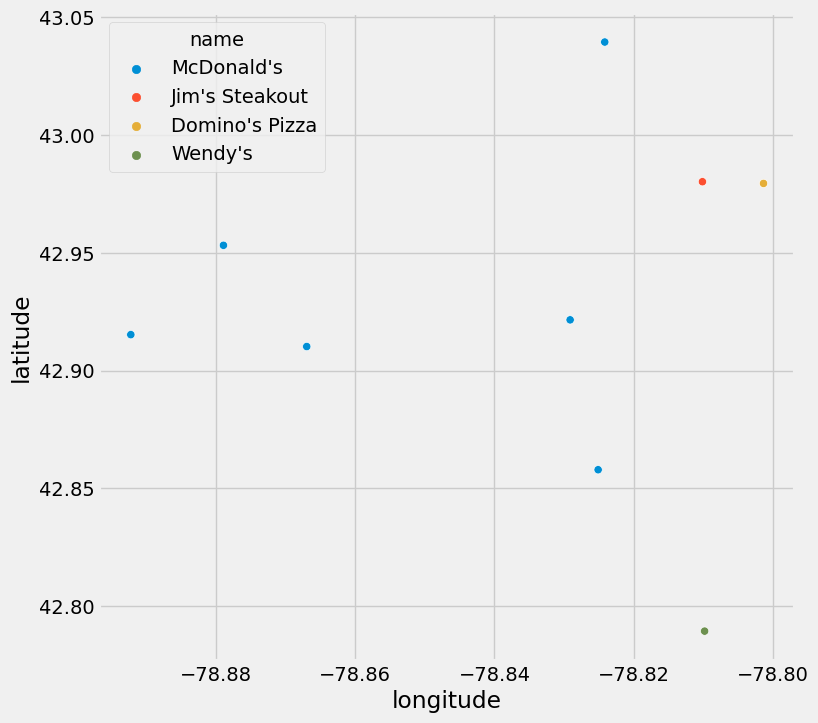

In [15]:
buffalo = ffood[ffood['city'] == 'Buffalo']

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=buffalo,
                x=buffalo['longitude'],
                y=buffalo['latitude'],
                hue=buffalo['name'],
                ax=ax);

### Question 3 (Exercise!):

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

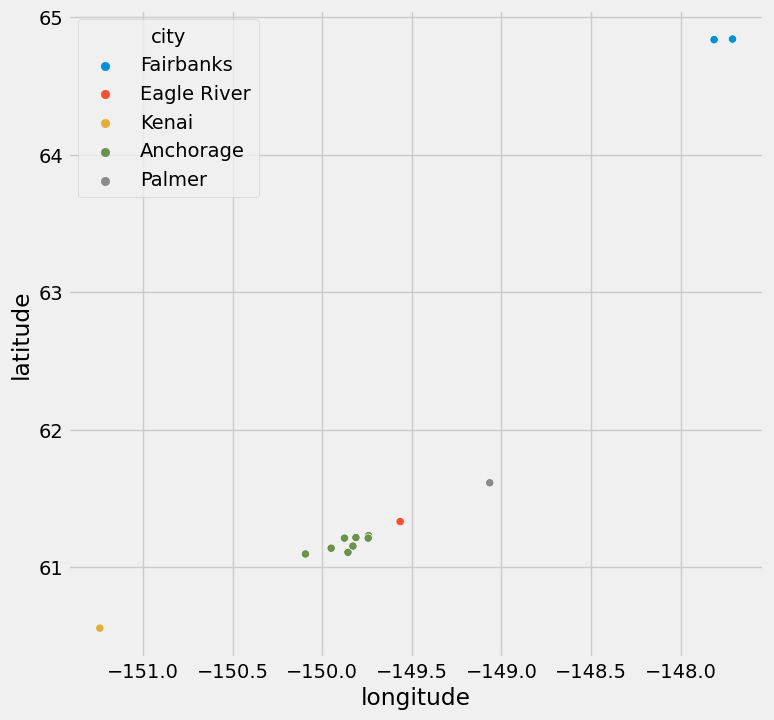

In [18]:
alaska = ffood[ffood['province'] == 'AK']

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=alaska,
                x=alaska['longitude'],
                y=alaska['latitude'],
                hue=alaska['city'],
                ax=ax);

<details>
    <summary>One answer here</summary>

```python
ak = ffood[ffood['province'] == 'AK']
ak[ak['name'] == 'Taco Bell']
```
</details>    

### Question 4 (Exercise!):

Convert the ZIP Codes to (five-digit) integers.

In [ ]:
I don't understand this.  The postalcodes are already five-digit integers.

<details>
    <summary>One answer here</summary>

```python
ffood['postalCodeNew'] = ffood['postalCode'].map(lambda x: int(x[:5]))
```
</details>

### Question 5 (Exercise!)

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers the ZIP Codes 94100-94188.)

In [28]:
sfo = ffood[ffood['city'] == 'San Francisco']

sfo['name'].value_counts()

Subway                     5
Burger King                2
Panda Express              1
Domino's Pizza             1
De Afghanan Kabob House    1
McDonald's                 1
Batter Up                  1
VeganBurg                  1
Pollo Campero              1
Chipotle Mexican Grill     1
Taqueria                   1
Name: name, dtype: int64

<details>
    <summary>Two answers here</summary>

```python
sf = ffood[ffood['city'] == 'San Francisco']
sf['name'].value_counts()
```
OR
    
```python
sf = ffood[(ffood['postalCodeNew'] >= 94100) & (ffood['postalCodeNew'] <= 94188)]
sf['name'].value_counts()
```
</details>

## Credit Card Data

In [29]:
credit = pd.read_csv('BankChurners.csv').iloc[:, :-2]

In [30]:
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [31]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [32]:
credit['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

We work for a credit card company and are worried about customers churning (becoming attrited).

### Question 1 (Exercise!)

Get the means of the numerical columns for the existing and the attrited customers separately.

In [36]:
credit.groupby('Attrition_Flag').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,
Attrited Customer,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


<details>
    <summary>One answer here</summary>

```python
credit.groupby('Attrition_Flag').mean()
```
</details>

### Question 2 (Exercise!)

Visualize the distributions of total revolving balances for each group.

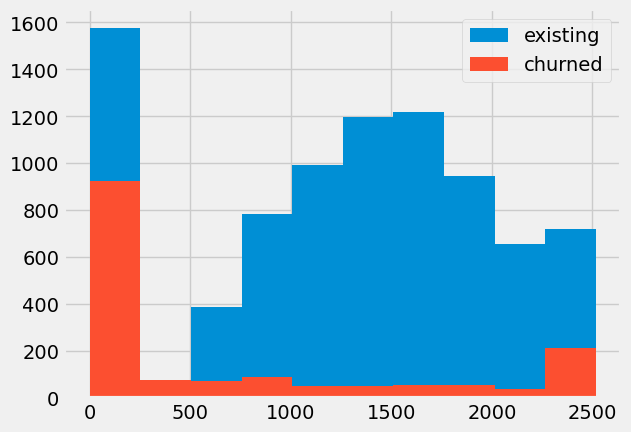

In [37]:
existing = credit[credit['Attrition_Flag'] == 'Existing Customer']
churned = credit[credit['Attrition_Flag'] == 'Attrited Customer']
fig, ax = plt.subplots()
ax.hist(existing['Total_Revolving_Bal'], label='existing')
ax.hist(churned['Total_Revolving_Bal'], label='churned')
ax.legend();

<details>
    <summary>One answer here</summary>

```python
existing = credit[credit['Attrition_Flag'] == 'Existing Customer']
churned = credit[credit['Attrition_Flag'] == 'Attrited Customer']
fig, ax = plt.subplots()
ax.hist(existing['Total_Revolving_Bal'], label='existing')
ax.hist(churned['Total_Revolving_Bal'], label='churned')
ax.legend();
```
</details>

### Question 3 (Exercise!)

Make two bar charts counting the numbers in each income category for each group separately.

C:\Users\stils\AppData\Local\Temp\ipykernel_27148\2123836292.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=churned_cats.index,


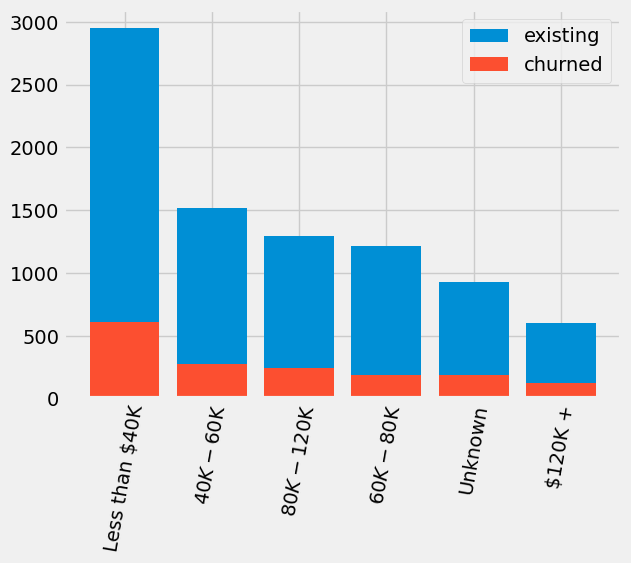

In [38]:
fig, ax = plt.subplots()
existing_cats = existing['Income_Category'].value_counts()
churned_cats = churned['Income_Category'].value_counts()
ax.bar(x=existing_cats.index,
       height=existing_cats, label='existing')
ax.bar(x=churned_cats.index,
       height=churned_cats, label='churned')
ax.set_xticklabels(labels=churned_cats.index,
                  rotation=80)
ax.legend();

<details>
    <summary>One answer here</summary>

```python
fig, ax = plt.subplots()
existing_cats = existing['Income_Category'].value_counts()
churned_cats = churned['Income_Category'].value_counts()
ax.bar(x=existing_cats.index,
       height=existing_cats, label='existing')
ax.bar(x=churned_cats.index,
       height=churned_cats, label='churned')
ax.set_xticklabels(labels=churned_cats.index,
                  rotation=80)
ax.legend();
```
</details>

# Level Up: Other Shape Descriptors

Here are a few other ways that people describe the distributions of data.

## Moments

The mean is related to $\Sigma(x_i - \bar{x})$ while the standard deviation is related to $\Sigma(x_i - \bar{x})^2$. We could consider higher exponents as well, of the form $\Sigma(x_i - \bar{x})^n$. For each exponent $n>0$, we can define a related statistical **moment**. For $n=3$, the moment is called the **skewness**, which is a measure of how the mean and median diverge. For $n=4$, the moment is called the **kurtosis**, which is a measure of how many values are relatively far from the mean.

There are a few different definitions of skewness and kurtosis that are commonly used, but the basic quantities are:

- $\frac{\Sigma(x_i - \bar{x})^3}{n\sigma^3}$ (for skewness)
- $\frac{\Sigma(x_i - \bar{x})^4}{n\sigma^4}$ (for kurtosis)

For more on statistical moments, see [here](https://www.statisticshowto.datasciencecentral.com/what-is-a-moment/) and [here](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics).

### Skewness

![skew](images/skew.png)

In [39]:
stats.skew(data)

0.09070457817005916

### Kurtosis

![kurt](images/kurtosis.png)

In [40]:
stats.kurtosis(data)

-1.152531975014872

What if we want to visualize the three histograms together?

## Symmetry

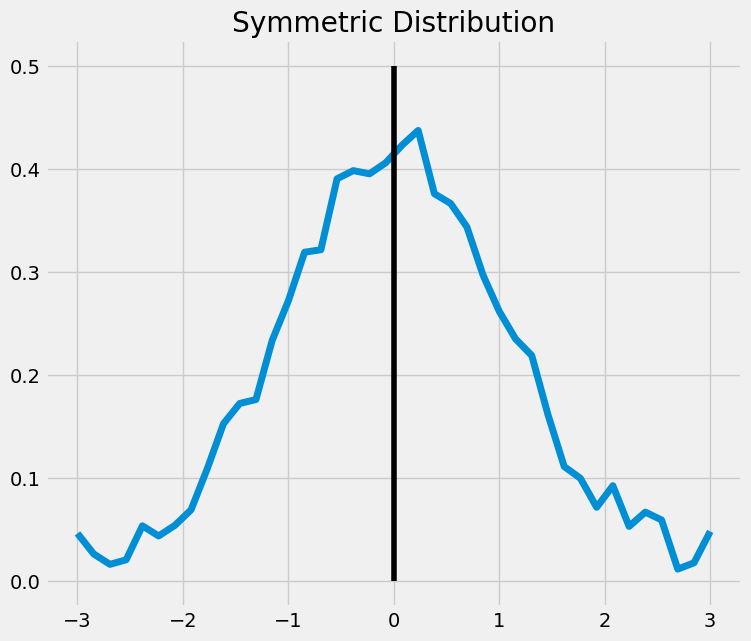

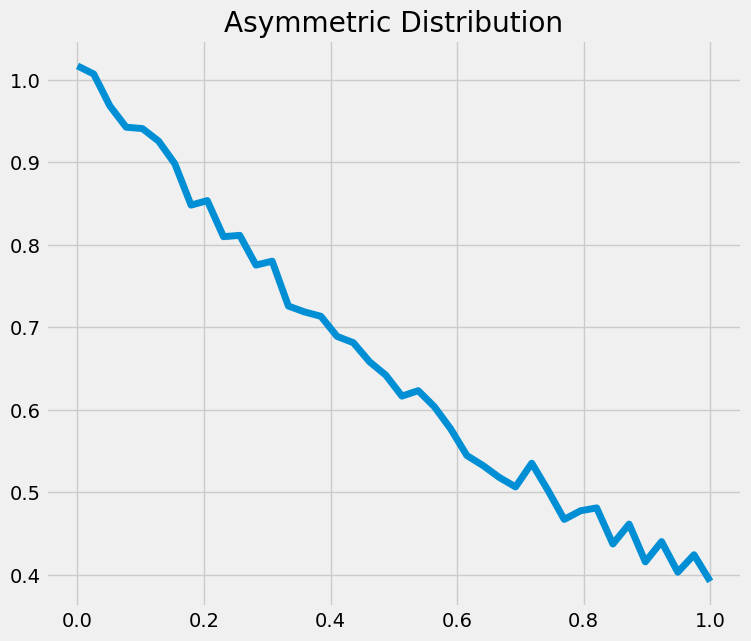

In [41]:
X = np.linspace(-3, 3, 40)
y = stats.norm.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
ax.vlines(x=0, ymin=0, ymax=0.5, colors = "black")
plt.title('Symmetric Distribution');

X = np.linspace(0, 1, 40)
y = stats.expon.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Asymmetric Distribution');

## Modality

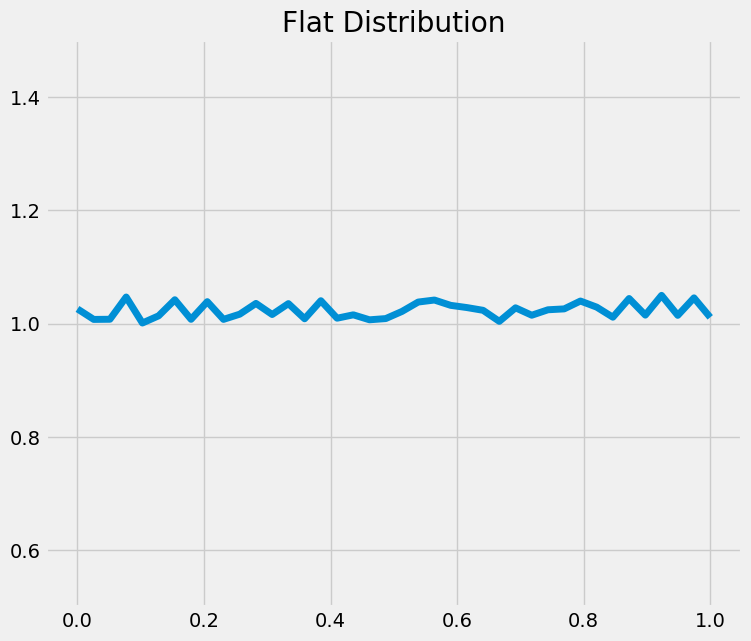

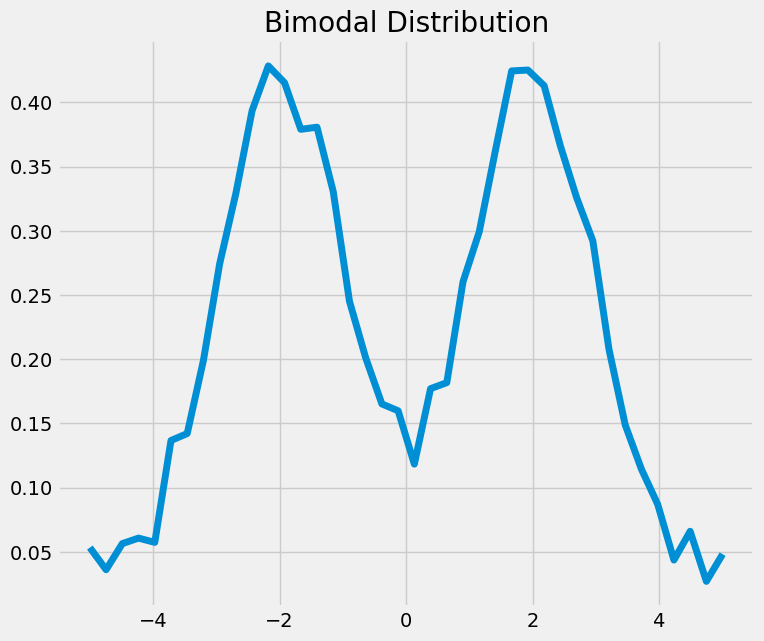

In [42]:
X = np.linspace(0, 1, 40)
y = stats.uniform.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.ylim(0.5, 1.5)
plt.title('Flat Distribution');

X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=-2) + stats.norm.pdf(X, loc=2)\
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Bimodal Distribution');